In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show_rgb(img):
    resize_img = cv2.resize(img,(640,480))
    img = cv2.cvtColor(resize_img.astype(np.uint8) , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

Enter the img path:  frog.jpeg


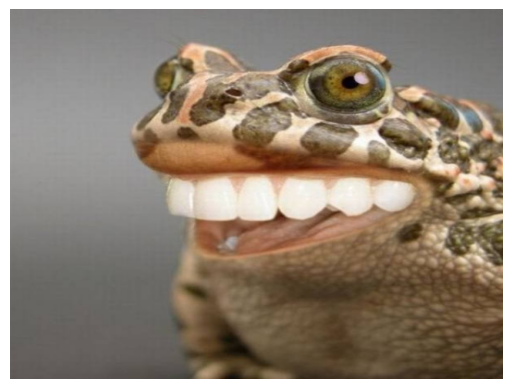

In [3]:
src_img = input('Enter the img path: ')
src_img = cv2.imread(src_img)
org_img = show_rgb(src_img)

In [4]:
def sharp_img(img):
    sharp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    img_array = np.array(org_img)
    output_array = np.zeros(img_array.shape, dtype=np.uint8)
    for k in range(0,3):
        for i in range(0,img_array.shape[0] - 2):
            for j in range(0, img_array.shape[1] - 2):
                sub_array = img_array[i:i+3 , j:j+3 , k]
                value = np.sum(sub_array*sharp_kernel)
                if value <0 :
                    output_array[i,j] = 0
                elif value > 255 :
                    output_array[i,j] = 255
                else:
                    output_array[i,j] = value
    cv2.imshow('Sharpened Image', output_array)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
def blur(img):
    gaussian_kernel = np.array([[0.0625,0.125,0.0625],[0.125,0.25,0.125],[0.0625,0.125,0.0625]])
    img_array = np.array(org_img)
    output_array = np.zeros(img_array.shape, dtype=np.uint8)
    for k in range(0,3):
        for i in range(0,img_array.shape[0] - 2):
            for j in range(0, img_array.shape[1] - 2):
                sub_array = img_array[i:i+3 , j:j+3 , k]
                value = np.sum(sub_array*gaussian_kernel)
                output_array[i,j] = value
    cv2.imshow('Blurred Image', output_array)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [6]:
def edge_det(img):
    sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sobel_y = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    img_array = np.array(org_img)
    output_array_x = np.zeros(img_array.shape, dtype=np.float64)
    output_array_y = np.zeros(img_array.shape, dtype=np.float64)
    for k in range(0,3):
        for i in range(0,img_array.shape[0] - 2):
            for j in range(0, img_array.shape[1] - 2):
                sub_array = img_array[i:i+3 , j:j+3 , k]
                value_x = np.sum(sub_array*sobel_x)
                value_y = np.sum(sub_array*sobel_y)
                output_array_x[i,j] = value_x
                output_array_y[i,j] = value_y
    output_array = cv2.magnitude(output_array_x , output_array_y)
    output_array = cv2.normalize(output_array, None, 0, 255, cv2.NORM_MINMAX)
    output_array = np.uint8(output_array)
    cv2.imshow('edge_img', output_array)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [7]:
sharp_img(org_img)
blur(org_img)
edge_det(org_img)